<a href="https://colab.research.google.com/github/karthikasi/Task-7/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,plot_roc_curve

**Importing the dataset**

In [4]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df['Gender']=df.Gender.map({"Male":0,"Female":1})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [6]:
X=df[["Gender","Age","EstimatedSalary"]].values
y=df["Purchased"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

**Feature Scaling**

In [15]:
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [60]:
X_train_scaled

array([[ 0.96922337,  0.5118008 ,  1.80675605],
       [-1.03175391, -0.24032896,  0.09003827],
       [-1.03175391,  0.13573592, -0.79693258],
       [ 0.96922337, -1.27450738, -1.08305221],
       [ 0.96922337,  0.32376836,  0.06142631],
       [-1.03175391,  0.22975214,  0.03281435],
       [ 0.96922337,  0.32376836, -1.14027614],
       [ 0.96922337,  1.07589811, -0.88276847],
       [ 0.96922337, -0.24032896, -1.34055988],
       [ 0.96922337,  0.41778458,  0.57644164],
       [-1.03175391, -1.74458847,  0.43338183],
       [-1.03175391,  0.41778458, -0.45358903],
       [ 0.96922337,  0.69983323,  1.74953213],
       [ 0.96922337,  1.54597921, -1.25472399],
       [ 0.96922337, -0.33434518,  0.06142631],
       [-1.03175391,  0.32376836,  0.26171005],
       [-1.03175391, -1.27450738, -1.45500773],
       [-1.03175391, -0.05229652,  0.26171005],
       [ 0.96922337, -1.83860469,  0.46199379],
       [-1.03175391, -0.8984425 , -0.31052921],
       [ 0.96922337,  0.60581701,  1.978

**Fitting SVM to the Training set**

In [38]:
from sklearn.svm import SVC #Suport Vector Machine Classifier
model = SVC(kernel='linear',random_state = 7)
model.fit(X_train_scaled,y_train)
model.support_vectors_


array([[ 0.96922337,  0.5118008 ,  1.80675605],
       [ 0.96922337,  0.32376836,  0.06142631],
       [-1.03175391,  0.41778458, -0.45358903],
       [-1.03175391,  0.32376836,  0.26171005],
       [-1.03175391,  0.22975214, -0.36775314],
       [ 0.96922337,  1.16991433, -0.73970866],
       [ 0.96922337,  0.32376836,  0.06142631],
       [-1.03175391,  0.98188189,  2.03565176],
       [ 0.96922337,  1.26393055,  1.83536802],
       [ 0.96922337, -0.4283614 ,  1.23451679],
       [-1.03175391,  0.32376836, -0.51081295],
       [ 0.96922337,  0.13573592, -0.31052921],
       [ 0.96922337, -0.24032896,  0.06142631],
       [-1.03175391,  0.22975214,  0.1472622 ],
       [ 0.96922337,  2.01606031, -0.79693258],
       [ 0.96922337,  0.22975214,  0.1472622 ],
       [-1.03175391,  0.22975214, -0.25330529],
       [-1.03175391, -0.24032896,  0.26171005],
       [ 0.96922337,  0.13573592, -0.25330529],
       [ 0.96922337, -0.71041006,  1.32035268],
       [-1.03175391,  0.32376836,  0.061

**Predicting the Test set results**

In [39]:
y_pred=model.predict(X_test_scaled)
print(y_pred)

print("accuracy score:\n",accuracy_score(y_test,y_pred))

[1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 0 1 0 0]
accuracy score:
 0.8625


**Making the Confusion Matrix**

Confusion Matrix :  [[48  6]
 [ 5 21]]


Text(69.0, 0.5, 'predicted')

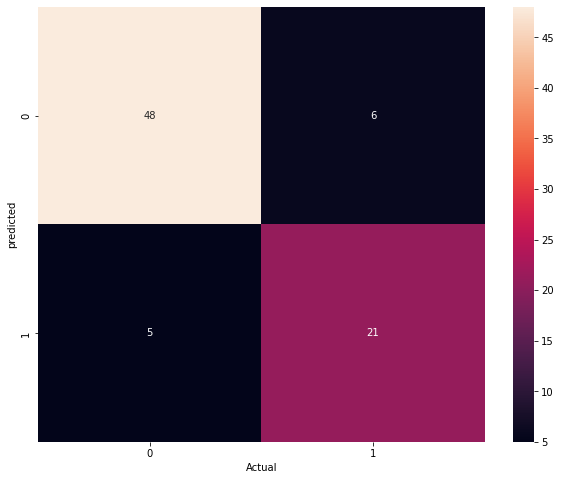

In [40]:
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual")
plt.ylabel("predicted")

**Visualising the Training set results**

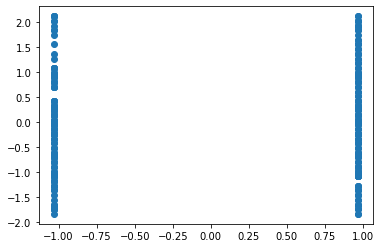

In [61]:
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],cmap=plt.cm.coolwarm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


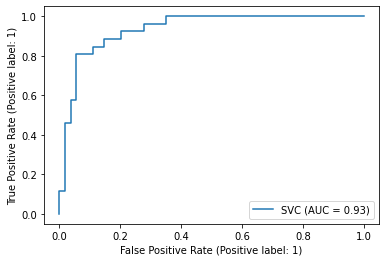

In [35]:
plot_roc_curve(model,X_test_scaled,y_test)

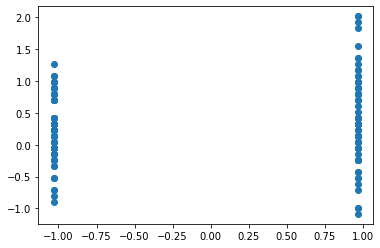

In [49]:
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

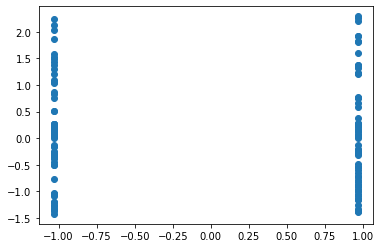

In [53]:
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,2])

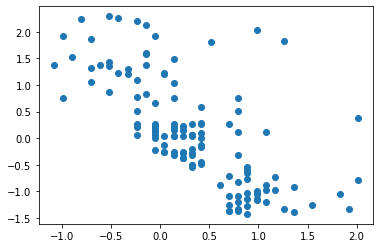

In [54]:
plt.scatter(model.support_vectors_[:,1],model.support_vectors_[:,2])

**Visualising the Test set results**

In [36]:
accuracy_score(y_test,y_pred)

0.8625